# House Price: Sales price prediction

In [1]:
import pandas as pd #DataFrame, Series
import numpy as np # Scientific computing packages - array

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
from sklearn.tree import export_graphviz
import io
from scipy import misc
import scipy.misc
scipy.misc.imread

from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#bring in the cute guys
df_train = pd.read_csv('/Users/yanhewu/Documents/git/DataExploration/Dataset/ProjectPractice/train.csv')

In [3]:
#check the six packs
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#data type for all the columns
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [5]:
#data type for specific column
df_train['SalePrice'].dtype

dtype('int64')

## Analysing'SalePrice'

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*Explaination:* 
Count:observations number  
Mean: average number  
Std:A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.Square root of variance.  
Percentail:use p*(n+1) get the location of the observation.50% is the medium.

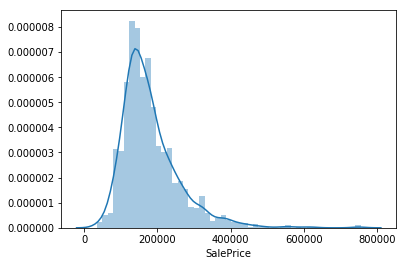

In [7]:
#histogram
sns.distplot(df_train['SalePrice']);

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Explaination: Skewness(compare with the normal distrubution, postive skewness: right hand side. negative skeness: left hand side)
Kurtosis: important concept in risk management.

### Relationship with numerical variables

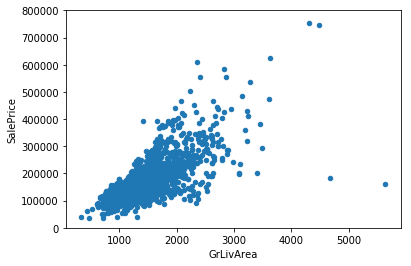

In [9]:
#scatter plot GrLivArea(above grade(ground)living area square feet)/SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

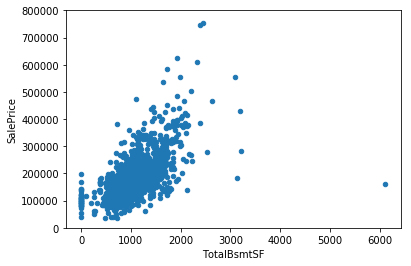

In [10]:
#scatter plot totalbsmtsf/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));

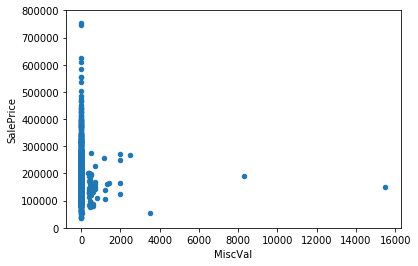

In [11]:
var = 'MiscVal'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000))

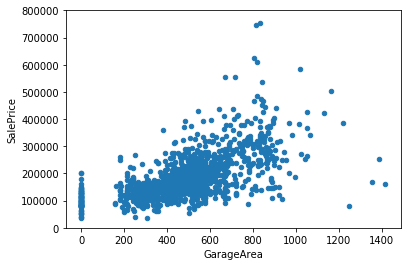

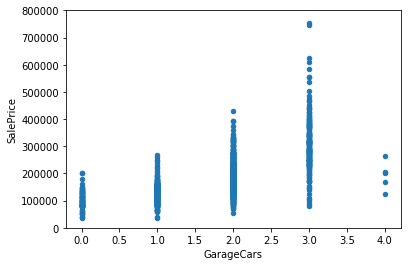

In [12]:
var = ['GarageArea','GarageCars']
for index in range(2):
    data = pd.concat([df_train['SalePrice'],df_train[var[index]]],axis=1)
    data.plot.scatter(x=var[index],y='SalePrice',ylim=(0,800000))

### Relationship with categorical features

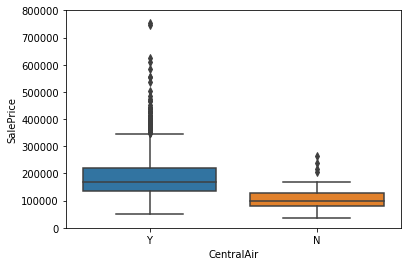

In [13]:
# CentralAir
var = 'CentralAir'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000);

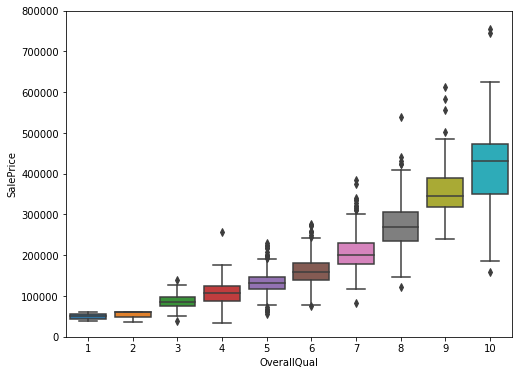

In [14]:
#box plot overallqual/Saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data = data)
fig.axis(ymin=0, ymax=800000);

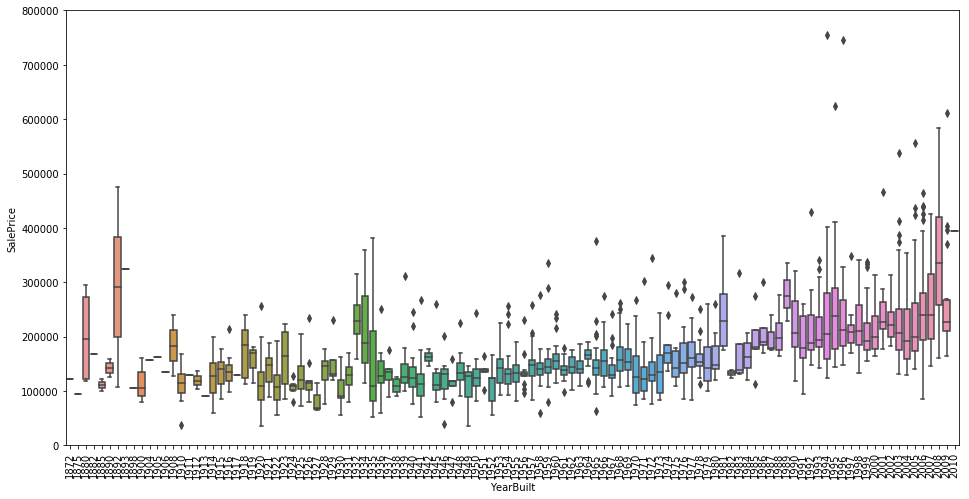

In [15]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

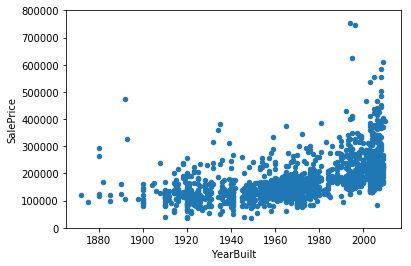

In [16]:
# YearBuilt Scatter
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000))

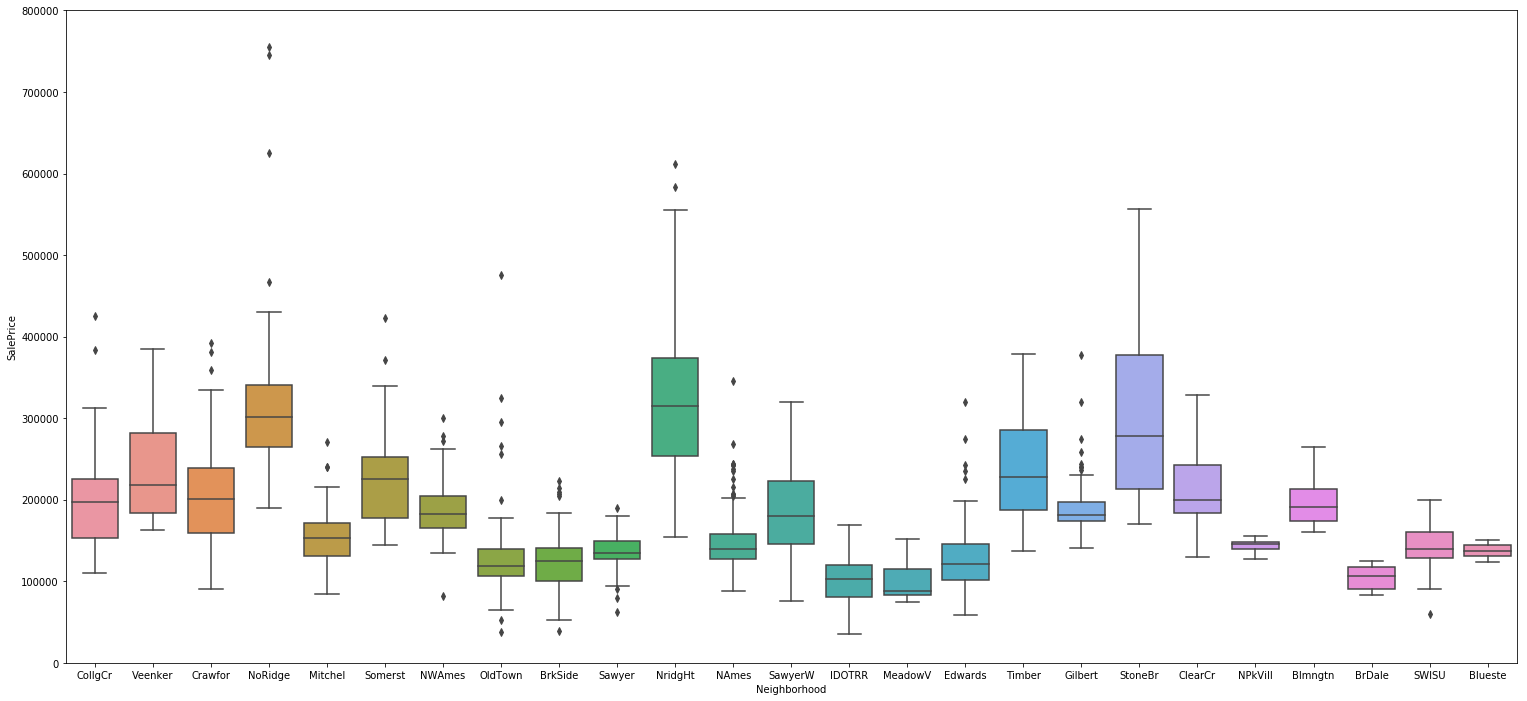

In [17]:
#Neighborhood
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26,12))
fig = sns.boxplot(x=var, y="SalePrice", data = data)
fig.axis(ymin=0, ymax=800000);

In [18]:
##TBD
location = []
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
data.sort_values(['Neighborhood','SalePrice'])
nb_data = data

_Questions: For this point, we only analysis the variables that we think important, which was very
subjecitve. What if other variables have a strong not reveal relationship with sales price? how to do with this situation, how will the company handle this situation. --Y.W_
    

### The 'plasma soup': Correlation matrix, 'SalePrice' correlation matrix, Scatter plots between the most correlated variables

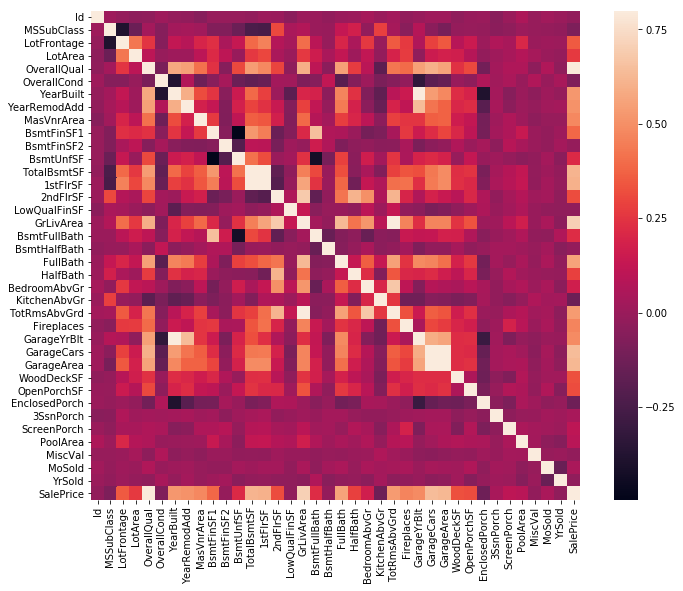

In [19]:
#correlation matrix
corrmat = df_train.corr()
f, ax =plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

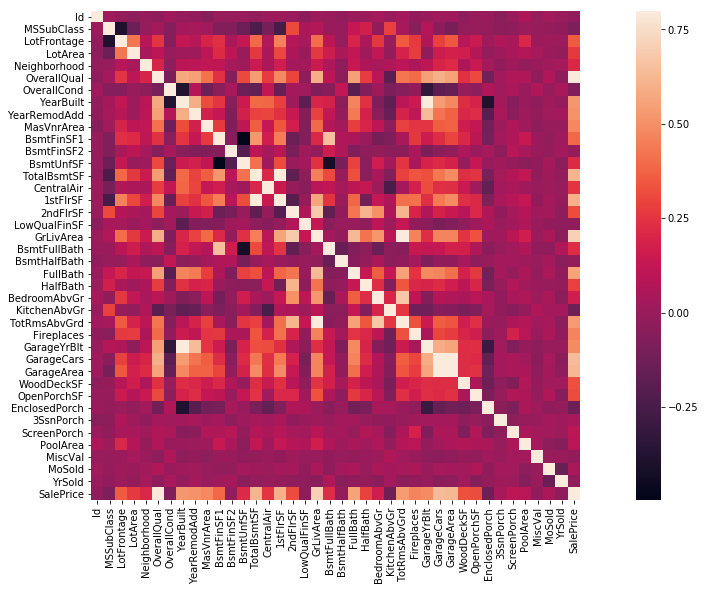

In [20]:
#离散型数据
from sklearn import preprocessing
f_names = ['CentralAir','Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    df_train[x] = label.fit_transform(df_train[x])
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmax=0.8,square=True)

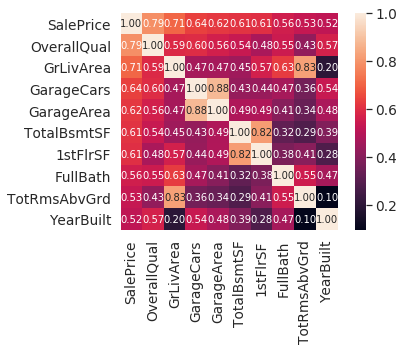

In [21]:
#SalePrice correlation matrix
k = 10 #number of vatiables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


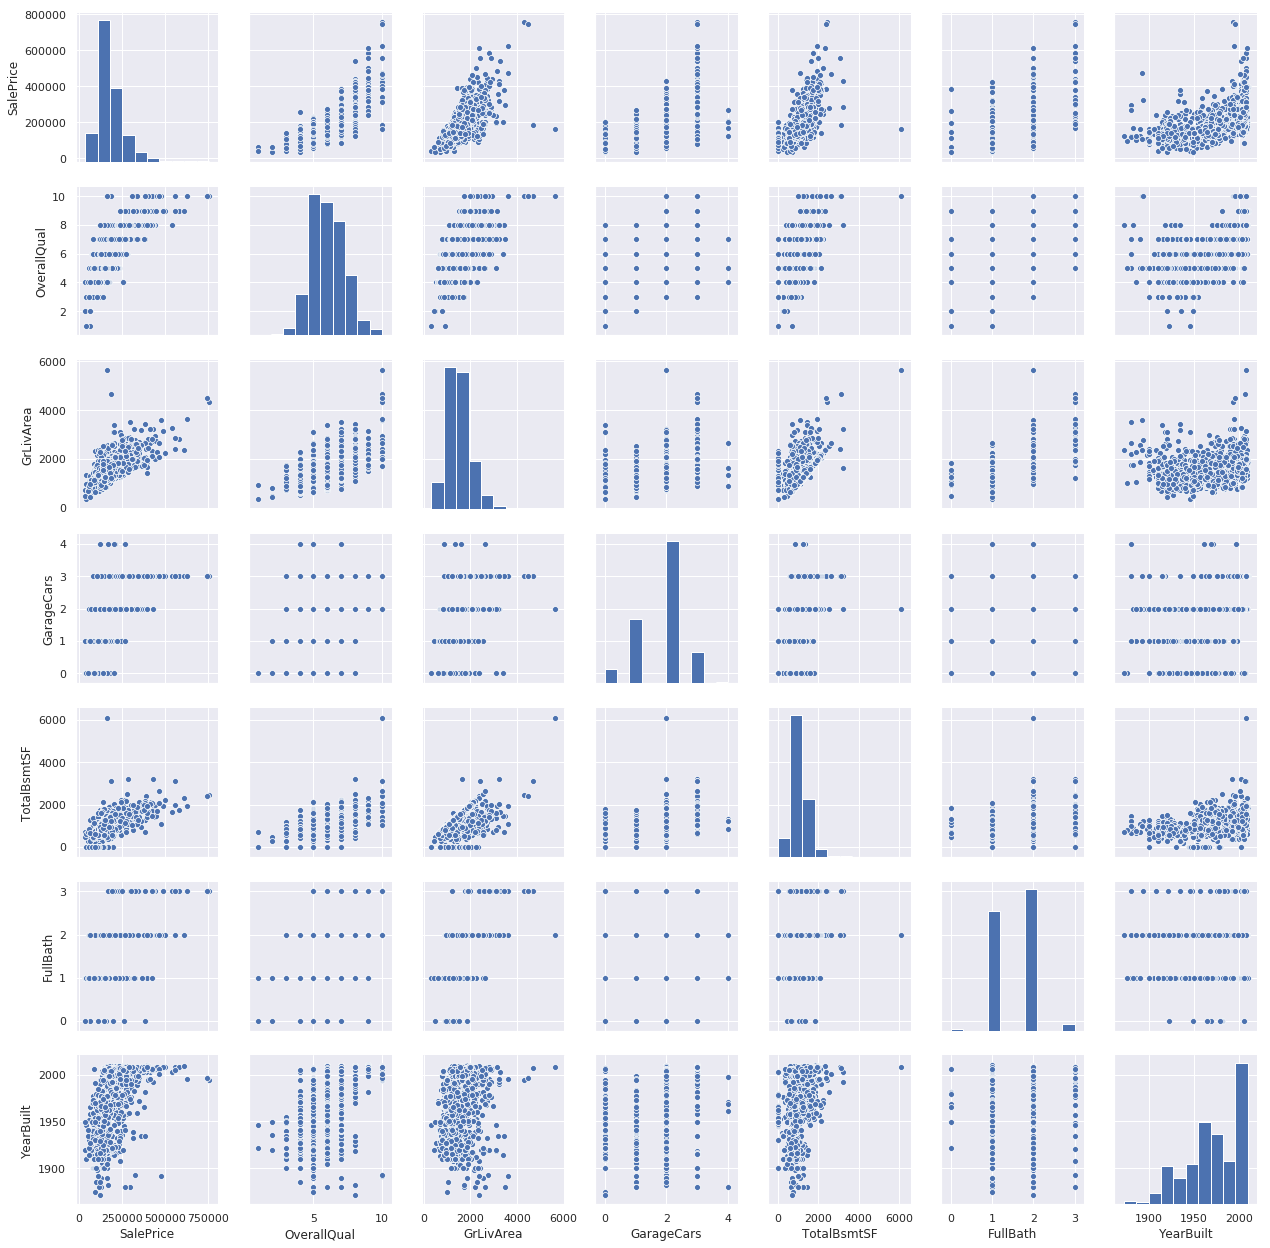

In [22]:
#Scatter plots between the most correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show();

### Missing Data

Concept:
* MNAR: (Nonignorable nonresponse) The value of the variable that's missing is related to the reason it's missing.
* MAR: The propensity for a data point to be missing is not related to the missing data, but it's related to some of the observed data.
* MCAR: No relationship between whether a data point is missing and any values in the data set, missing or observed.

In [23]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [24]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #checking that there's no missing data missing...

0

### Out liars

In [25]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


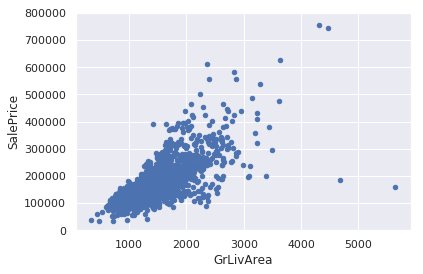

In [26]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd. concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(1,800000));

In [27]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2] #get the 2 highest value id.
df_train = df_train.drop(df_train[df_train['Id']== 1299].index)
df_train = df_train.drop(df_train[df_train['Id']==524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


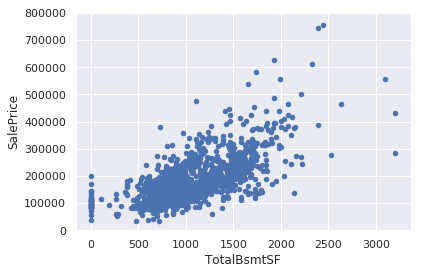

In [28]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

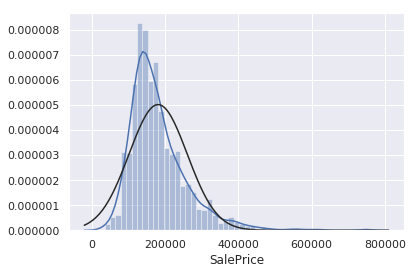

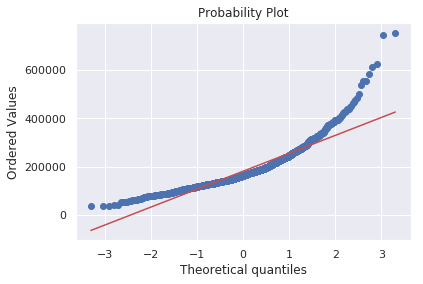

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Questions: why we need to do log(transformed the data), are we refer the before transform graph for decision making or the one after? --Y.W

In [30]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

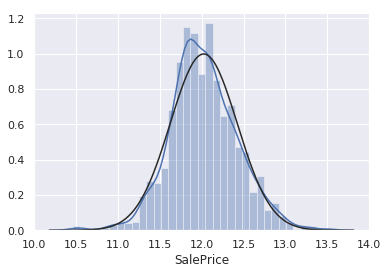

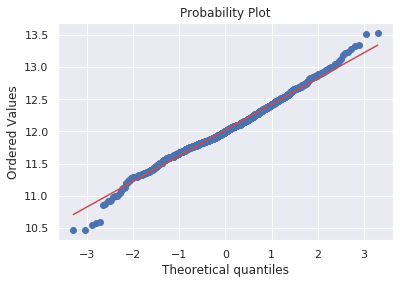

In [31]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

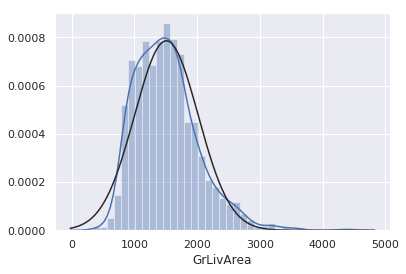

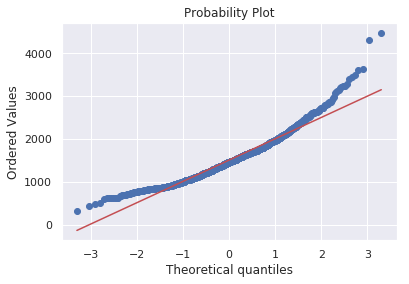

In [32]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [33]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

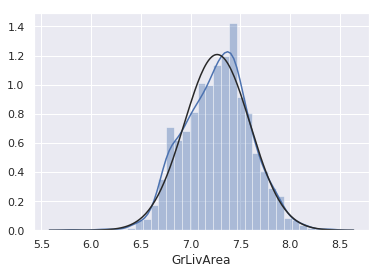

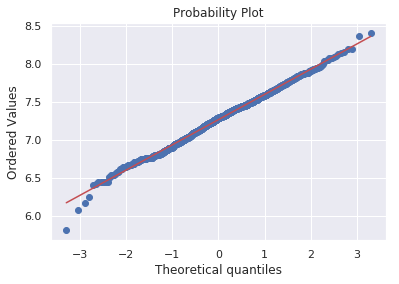

In [34]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

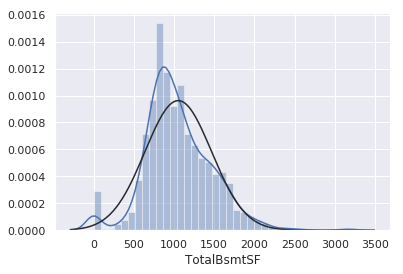

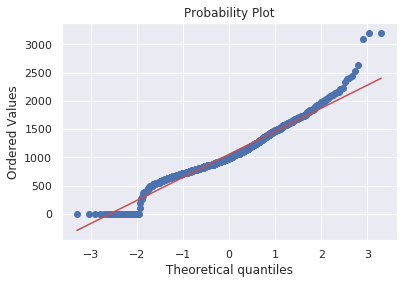

In [35]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [36]:
#create column for new variable(one is enough becuase it's a binary categorical feature)
#if area>0 it gets 1, for area ==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [37]:
# transform data
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

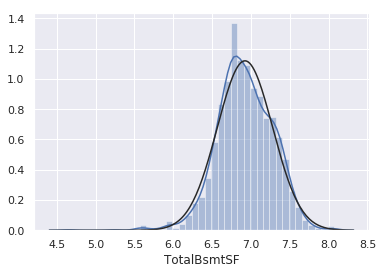

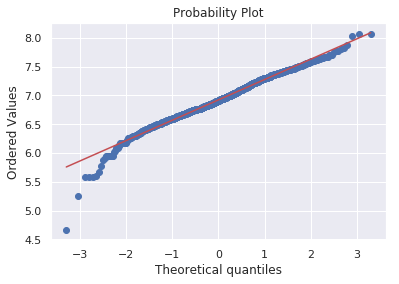

In [38]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### Homoscedasticity

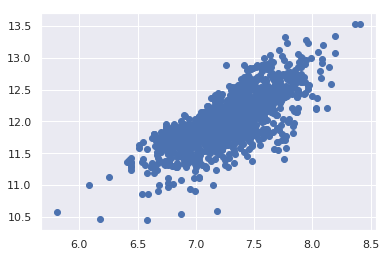

In [39]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

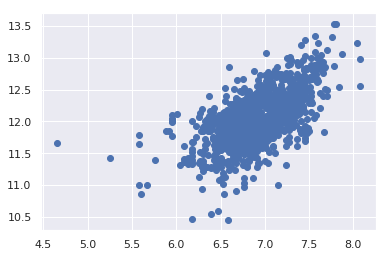

In [40]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [41]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [42]:
df_train

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,5,7,5,2003,2003,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,24,6,8,1976,1976,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,5,7,5,2001,2002,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,6,7,5,1915,1970,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,15,8,5,2000,2000,655,0,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,11,5,5,1993,1995,732,0,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,21,8,5,2004,2005,1369,0,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,14,7,6,1973,1973,859,32,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,17,7,5,1931,1950,0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,3,5,6,1939,1950,851,0,...,0,0,0,1,0,0,0,0,1,0


### Decision Tree Analysis

In [43]:
data = df_train

In [44]:
train, test = train_test_split(data, test_size = 0.15)

In [45]:
print("Training size: {}; Test Size: {}".format(len(train), len(test)))

Training size: 1238; Test Size: 219


In [46]:
c = DecisionTreeClassifier(min_samples_split=100)

In [47]:
features = ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]
#,"OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"

In [48]:
x_train = train[features]
y_train = train["SalePrice"]

x_test = test[features]
y_test = test["SalePrice"]

In [49]:
dt = c.fit(x_train, y_train.astype('int'))

In [50]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

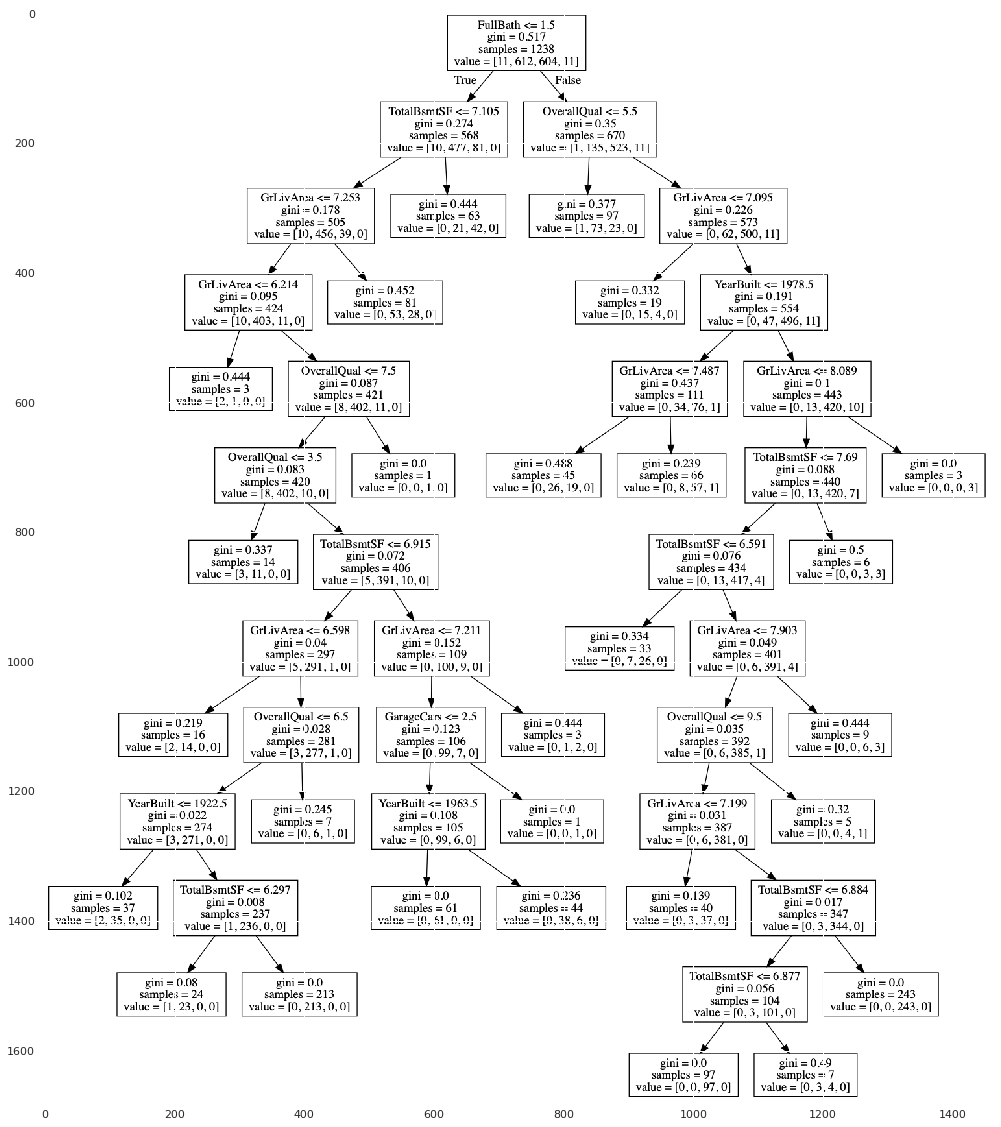

In [51]:
show_tree(dt, features, 'dec_tree_01.png')